In [1]:
## Dependencies
import csv
import numpy as np
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [2]:
## Read Movie csv file into Movie pandas data frame
data = pd.read_csv("movie.csv")
movie_data = pd.DataFrame(data)

In [3]:
## Bar Chart to display number of movies produced by each Studio

# count number of movies by each studio
studio_data = (movie_data["Studio"].value_counts())
studio_data = studio_data.to_frame()
studio_data = studio_data.reset_index()
# rename columns in studio_data
studio_data = studio_data.rename(columns = {"index":"studio_name", "Studio":"movie_count"})
# create list of studio names
studios =studio_data["studio_name"].tolist()
# create list of colors for bar chart
colors = ["red", "green", "blue"]
# create bar chart to display studios and number of movies  
def f(color):
    plt.bar(studio_data["studio_name"].sort_values(), studio_data["movie_count"], color= color )
    plt.title("Movies by Studio",fontsize = 18 )
    plt.xlabel("Studio", fontsize = 14)
    plt.ylabel("Number of Movies", fontsize = 14)
    plt.ylim(0, studio_data["movie_count"].max() + 1)
    mpl.style.use("seaborn")
    plt.show()    
interact(f, color=colors)

interactive(children=(Dropdown(description='color', options=('red', 'green', 'blue'), value='red'), Output()),…

<function __main__.f>

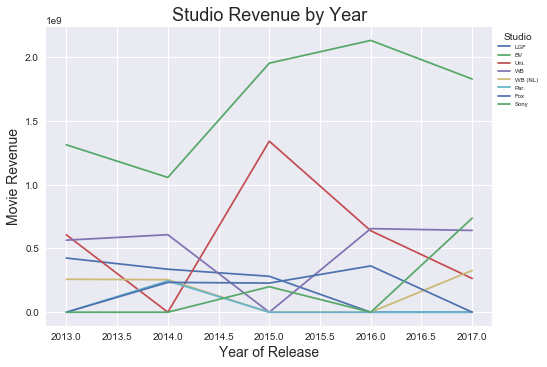

In [4]:
## Studio Revenue by Year line chart

movie_data.columns = movie_data.columns.str.replace(" ", "_")

revenue = movie_data.groupby(["Year","Studio"]).Total_Gross.sum()
revenue_df = pd.DataFrame(revenue)
revenue_pivot = pd.pivot_table(revenue_df,values='Total_Gross', index=['Year'], columns=['Studio'], aggfunc=np.sum )
revenue_pivot = revenue_pivot.reset_index()
revenue_pivot = revenue_pivot.fillna(value=0)

Studio_list = movie_data["Studio"].unique().tolist()

for Studio in Studio_list:
    plt.plot(revenue_pivot["Year"], revenue_pivot[Studio], label = Studio)
    plt.title("Studio Revenue by Year",fontsize = 18 )
    plt.legend(title= "Studio",loc='upper left', prop={'size':6}, bbox_to_anchor=(1,1) )
    plt.ylabel("Movie Revenue", fontsize = 14)
    plt.xlabel("Year of Release", fontsize = 14)
    mpl.style.use("seaborn")
    
plt.show() 
plt.savefig('StudioRevenuebyYear.png') 

In [5]:
## Pie chart to compare YouTube Like v.s YouTube Dislike for each Movie

movies_list = movie_data["Movie_Title"].unique().tolist()

def f(Movie):
    like = movie_data.loc[(movie_data["Movie_Title"] == Movie),'Like_Count'].values
    dislike = movie_data.loc[(movie_data["Movie_Title"] == Movie),'Dislike_Count'].values
    cols =["lightskyblue","lightcoral"]
    plt.pie([like, dislike],  autopct= '%1.1f%%', explode= (0,0.1), shadow=True, startangle=140, colors = cols)
    plt.title("YouTube Like v.s YouTube Dislike",fontsize = 18 )
    plt.legend(["YouTube Like", "YouTube Dislike"])
    plt.axis("equal")
    plt.show()   
interact(f, Movie=movies_list)

interactive(children=(Dropdown(description='Movie', options=('The Hunger Games: Catching Fire', 'Iron Man 3', …

<function __main__.f>

In [6]:
## Studio Budget and Revenue by Year Line Chart for each Studio

studio_list = movie_data["Studio"].unique().tolist()

def f(Studio):
    plt.plot(revenue_pivot["Year"], revenue_pivot[Studio], color = "green", label = Studio + " Revenue")
    #plt.plot(year, cost, color = "red", label = Studio + "Budget")
    plt.title("Studio Budget and Revenue by Year",fontsize = 18 )
    plt.legend(title= "Studio")
    plt.ylabel("Amount($)")
    plt.xlabel("Year of Release")
    plt.xticks(range(2013,2018))
    mpl.style.use("seaborn")
    plt.show()
    
interact(f, Studio=studio_list)

interactive(children=(Dropdown(description='Studio', options=('LGF', 'BV', 'Uni.', 'WB', 'WB (NL)', 'Par.', 'F…

<function __main__.f>

In [7]:
## Revenue by Movie Title Scatter Chart for each Year

year_list = movie_data["Year"].unique().tolist()

def f(Year):
    movie_title = movie_data.loc[(movie_data["Year"] == Year),'Movie_Title'].values
    revenue = movie_data.loc[(movie_data["Year"] == Year),'Total_Gross'].values
    
    plt.scatter(movie_title, revenue)
    plt.title(" Revenue by Movie Title",fontsize = 18 )
    plt.ylabel("Movie Revenue ($Billion)", fontsize = 14)
    plt.xlabel("Movie Title", fontsize = 14)
    plt.ylim(0,1000000000)
    plt.xticks(rotation=90)
    mpl.style.use("seaborn")
    plt.show()
interact(f, Year=year_list)    

interactive(children=(Dropdown(description='Year', options=(2013, 2014, 2015, 2016, 2017), value=2013), Output…

<function __main__.f>

In [8]:
movie_data['Theaters'] = movie_data['Theaters'].str.replace(',','')
movie_data['Theaters'] = pd.to_numeric(movie_data['Theaters'])

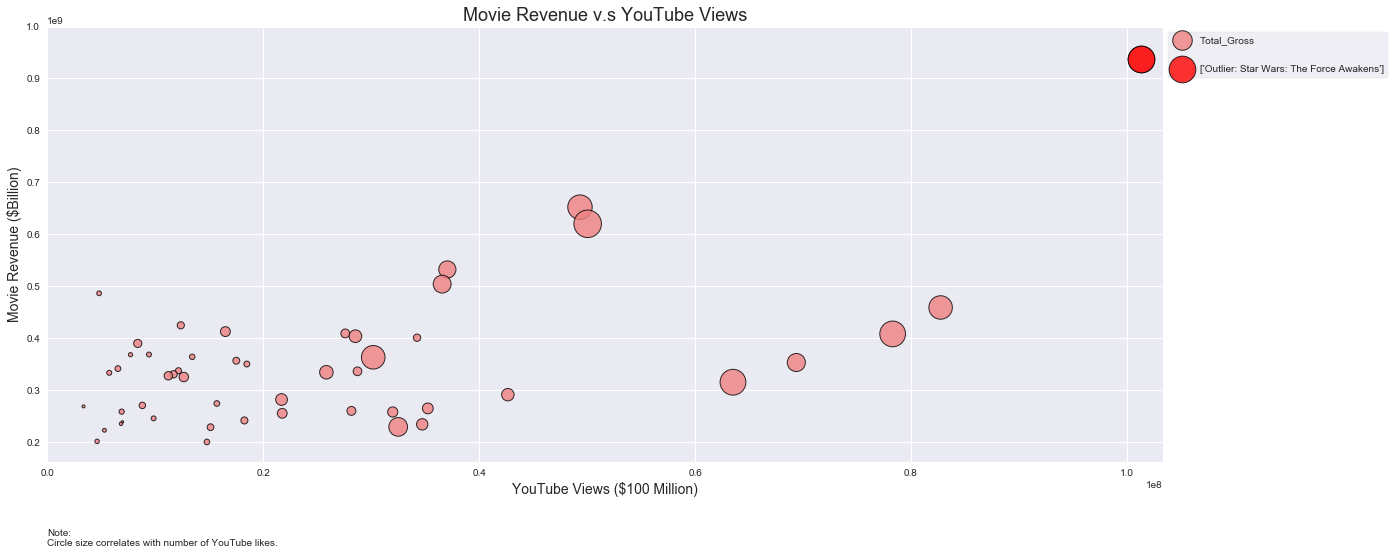

In [10]:
## Bubble chart for Movie Revenue v.s YouTube Views with circle size correlates with number of YouTube likes

plt.figure(figsize=(20, 8))

movie_outlier = movie_data.loc[movie_data["Total_Gross"] > 700000000,["View_Count", "Total_Gross", "Like_Count", "Movie_Title"] ]

plt.scatter(movie_data["View_Count"],movie_data["Total_Gross"], s= (movie_data["Like_Count"]/1000), 
            c="lightcoral", edgecolor='black', lw=1, alpha=0.8 )
plt.scatter(movie_outlier["View_Count"], movie_outlier["Total_Gross"], edgecolor='black', lw=1, alpha=0.8, 
            c="red", s= (movie_outlier["Like_Count"]/1000), label= "Outlier: " + movie_outlier["Movie_Title"].values )

plt.title("Movie Revenue v.s YouTube Views", fontsize = 18) 
plt.xlabel("YouTube Views ($100 Million)", fontsize = 14)
plt.ylabel("Movie Revenue ($Billion)", fontsize = 14)
plt.xlim(0,movie_data["View_Count"].max() + 2000000)
plt.text(0.1,0.1,"Note:\nCircle size correlates with number of YouTube likes.")
mpl.style.use("seaborn")
plt.legend(labelspacing= 2, frameon=True, bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('RevenueVSY_view.png')
plt.show()

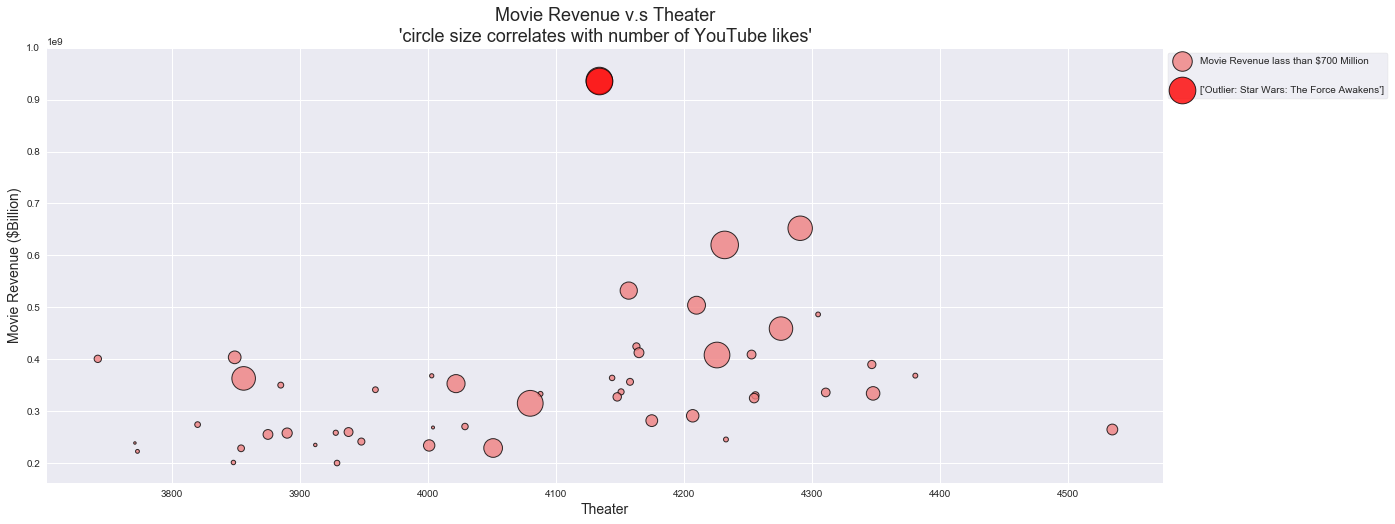

In [11]:
## Bubble chart for Movie Revenue v.s Theater with circle size correlates with number of YouTube likes

plt.figure(figsize=(20, 8))

movie_outlier = movie_data.loc[movie_data["Total_Gross"] > 700000000,["Theaters", "Total_Gross", "Like_Count", "Movie_Title"] ]


plt.scatter(movie_data["Theaters"],movie_data["Total_Gross"], s= (movie_data["Like_Count"]/1000),
            c="lightcoral", edgecolor='black', lw=1, alpha=0.8, label= "Movie Revenue lass than $700 Million")

plt.scatter(movie_outlier["Theaters"], movie_outlier["Total_Gross"], edgecolor='black', lw=1, alpha=0.8, 
            c="red", s= (movie_outlier["Like_Count"]/1000), label= "Outlier: " + movie_outlier["Movie_Title"].values )
plt.title("Movie Revenue v.s Theater\n'circle size correlates with number of YouTube likes'", fontsize = 18) 
plt.xlabel("Theater", fontsize = 14)
plt.ylabel("Movie Revenue ($Billion)", fontsize = 14)

plt.legend(labelspacing= 2, frameon=True, bbox_to_anchor=(1,1), loc="upper left")
mpl.style.use("seaborn")
plt.savefig('RevenueVSTheater.png')
plt.show()

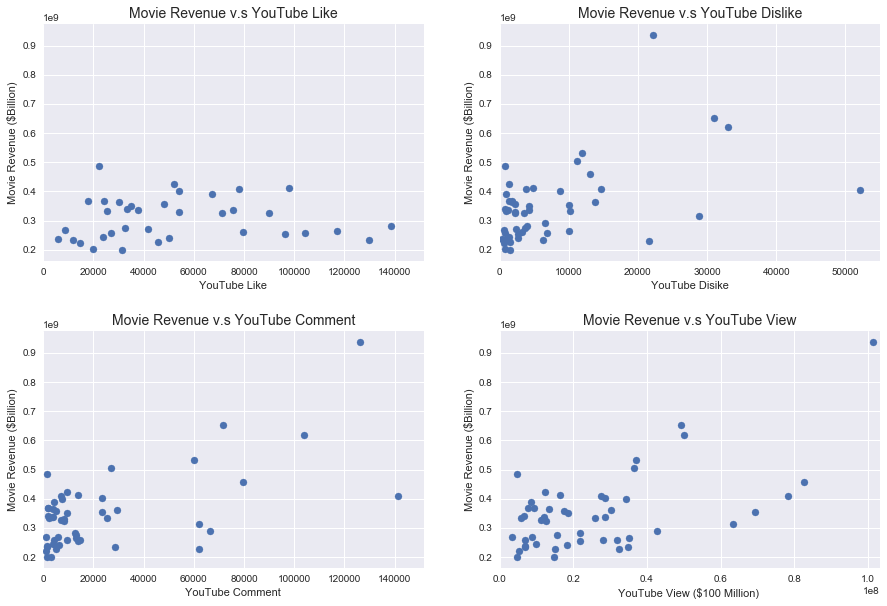

In [12]:
## Compare the correlation between Movie Revenue and YouTube Variables

fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(movie_data["Like_Count"], movie_data["Total_Gross"])
plt.title('Movie Revenue v.s YouTube Like', fontsize= 14)
plt.xlabel('YouTube Like')
plt.ylabel("Movie Revenue ($Billion)")
plt.xlim(0,movie_data["Comment_Count"].max() + 10000)
mpl.style.use("seaborn")

plt.subplot(2, 2, 2)
plt.scatter(movie_data["Dislike_Count"], movie_data["Total_Gross"])
plt.title('Movie Revenue v.s YouTube Dislike', fontsize= 14)
plt.xlabel('YouTube Disike')
plt.ylabel("Movie Revenue ($Billion)")
plt.xlim(0,55000 )
mpl.style.use("seaborn")

plt.subplot(2, 2, 3)
plt.scatter(movie_data["Comment_Count"], movie_data["Total_Gross"])
plt.title('Movie Revenue v.s YouTube Comment', fontsize= 14)
plt.xlabel('YouTube Comment')
plt.ylabel("Movie Revenue ($Billion)")
plt.xlim(0,movie_data["Comment_Count"].max() + 10000)
mpl.style.use("seaborn")

plt.subplot(2, 2, 4)
plt.scatter(movie_data['View_Count'], movie_data["Total_Gross"])
plt.title('Movie Revenue v.s YouTube View', fontsize= 14)
plt.xlabel('YouTube View ($100 Million) ')
plt.ylabel("Movie Revenue ($Billion)")
plt.xlim(0,movie_data['View_Count'].max() + 2000000)
mpl.style.use("seaborn")

fig.subplots_adjust(wspace=0.2, hspace= 0.3)
plt.savefig('multipleScatterYouTube.png')
plt.show()

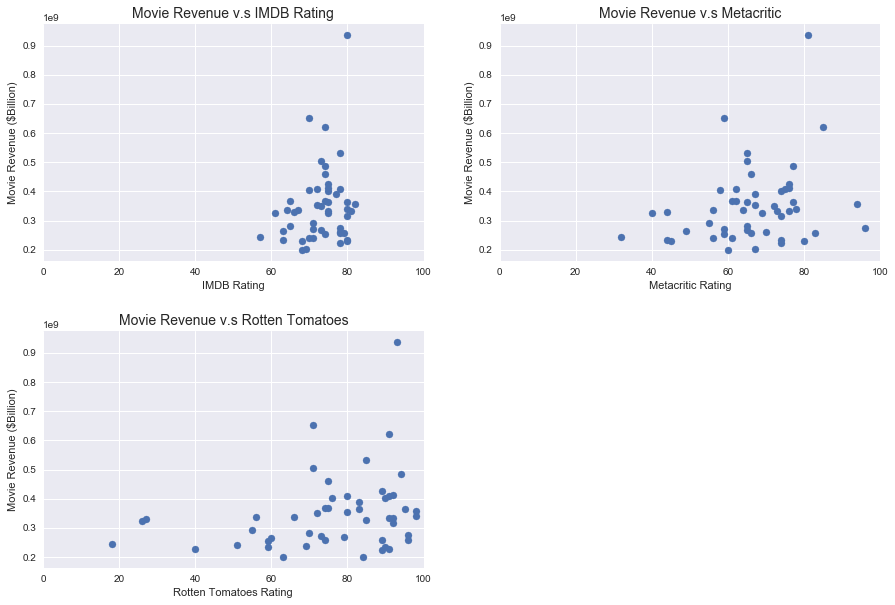

In [13]:
## Compare the correlation between Movie Revenue and Movie Rating Variables

fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(movie_data["IMDB_Rating"], movie_data["Total_Gross"])
plt.title('Movie Revenue v.s IMDB Rating', fontsize= 14)
plt.xlabel('IMDB Rating')
plt.ylabel("Movie Revenue ($Billion)")
plt.xlim(0,100)
mpl.style.use("seaborn")

plt.subplot(2, 2, 2)
plt.scatter(movie_data["Metacritic"], movie_data["Total_Gross"])
plt.title('Movie Revenue v.s Metacritic', fontsize= 14)
plt.xlabel('Metacritic Rating')
plt.ylabel("Movie Revenue ($Billion)")
plt.xlim(0,100)
mpl.style.use("seaborn")

plt.subplot(2, 2, 3)
plt.scatter(movie_data["Rotten_Tomatoes_(%)"], movie_data["Total_Gross"])
plt.title('Movie Revenue v.s Rotten Tomatoes', fontsize= 14)
plt.xlabel('Rotten Tomatoes Rating')
plt.ylabel("Movie Revenue ($Billion)")
plt.xlim(0,100)
mpl.style.use("seaborn")


fig.subplots_adjust(wspace=0.2, hspace= 0.3)
plt.savefig('multipleScatterRating.png')
plt.show()

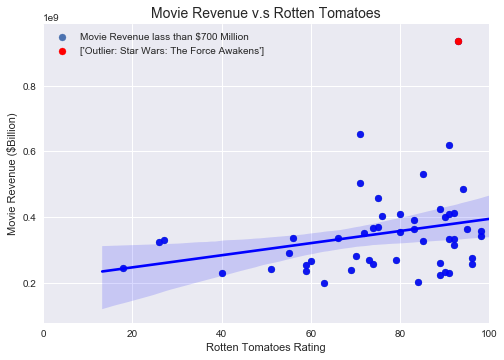

In [14]:
## Detecting Outliers in Movie Revenue v.s Rotten Tomatoes Rating
movie_outlier = movie_data.loc[movie_data["Total_Gross"] > 700000000,["Rotten_Tomatoes_(%)", "Total_Gross", "Movie_Title"] ]

plt.scatter(movie_data["Rotten_Tomatoes_(%)"], movie_data["Total_Gross"], 
            label= "Movie Revenue lass than $700 Million")

# display Correlation line 
sns.regplot(movie_data["Rotten_Tomatoes_(%)"],movie_data["Total_Gross"], color = "blue")

plt.scatter(movie_outlier["Rotten_Tomatoes_(%)"], movie_outlier["Total_Gross"], 
            c="red", label= "Outlier: " + movie_outlier["Movie_Title"].values )

plt.title('Movie Revenue v.s Rotten Tomatoes', fontsize= 14)
plt.xlabel('Rotten Tomatoes Rating')
plt.ylabel("Movie Revenue ($Billion)")
plt.xlim(0,100)
plt.legend()
mpl.style.use("seaborn")
plt.savefig('RottenRating.png')
plt.show()

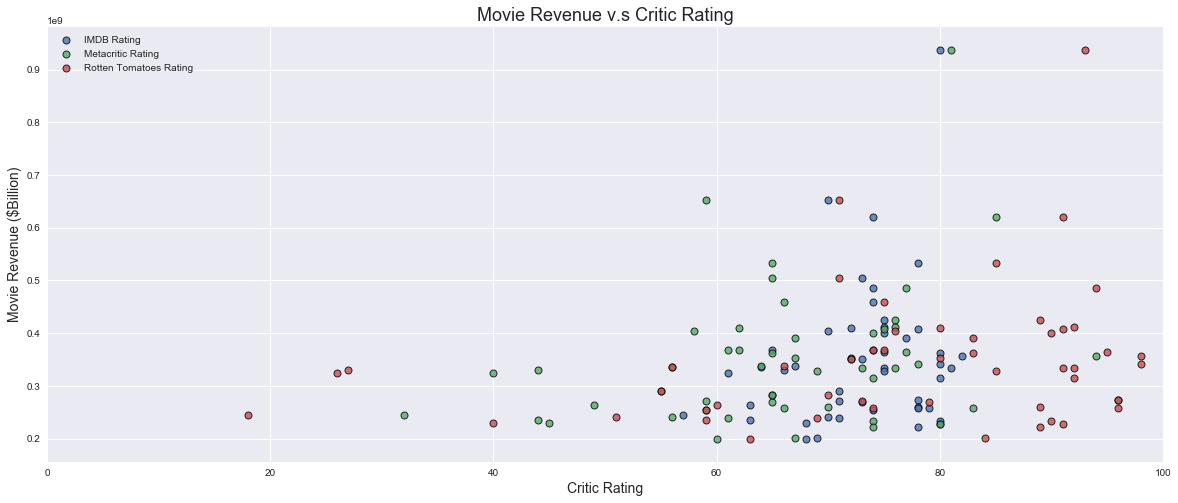

In [15]:
plt.figure(figsize=(20, 8))

plt.scatter(movie_data["IMDB_Rating"], movie_data["Total_Gross"],label='IMDB Rating',
            edgecolor='black', lw=1, alpha=0.8)
plt.title('Movie Revenue v.s Critic Rating', fontsize= 18)
plt.ylabel("Movie Revenue ($Billion)", fontsize= 14)
plt.xlabel('Critic Rating', fontsize= 14)
plt.xlim(0,100)
mpl.style.use("seaborn")
plt.legend()

plt.scatter(movie_data["Metacritic"], movie_data["Total_Gross"], label='Metacritic Rating',
            edgecolor='black', lw=1, alpha=0.8 )
plt.legend()

plt.scatter(movie_data["Rotten_Tomatoes_(%)"], movie_data["Total_Gross"], label='Rotten Tomatoes Rating',
            edgecolor='black', lw=1, alpha=0.8 )
plt.legend()
plt.savefig('MovieRevenuev.sRating.png')

plt.show()

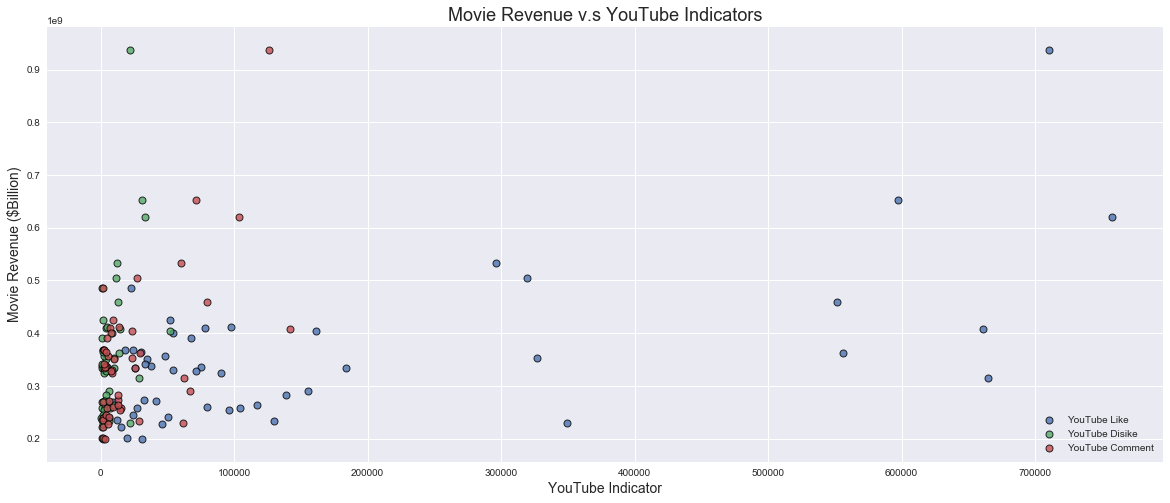

In [16]:
plt.figure(figsize=(20, 8))

plt.scatter(movie_data["Like_Count"], movie_data["Total_Gross"], label= 'YouTube Like',
            edgecolor='black', lw=1, alpha=0.8 )
plt.title('Movie Revenue v.s YouTube Indicators', fontsize= 18)
plt.xlabel('YouTube Indicator', fontsize= 14)
plt.ylabel("Movie Revenue ($Billion)", fontsize= 14)
mpl.style.use("seaborn")
plt.legend()

plt.scatter(movie_data["Dislike_Count"], movie_data["Total_Gross"], label='YouTube Disike', 
            edgecolor='black', lw=1, alpha=0.8)
plt.legend()

plt.scatter(movie_data["Comment_Count"], movie_data["Total_Gross"], label='YouTube Comment',
            edgecolor='black', lw=1, alpha=0.8)
plt.legend()
plt.savefig('MovieRYouTube.png')

plt.show()